# **Importing Libraries**

In [ ]:
import os
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report



# **EXPLORATORY DATA ANALYSIS**

In [ ]:
# IMPORTING DATASET
df=pd.read_csv('kd.csv')
print(df)
print('============ Total number of columns====================')
print(df.columns)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

**DESCRIPTIVE STATISTICS**

In [ ]:

print('================================== DATA STATISTICS ==========================')
print(df.describe())
print('================================== DATA COUNT ==========================')
print(df.count())
print('================================== DATA SHAPE ==========================')
print(df.shape)
print('================================== DATA NDIM ==========================')
print(df.ndim)
print('================================== DATA DTYPE ==========================')
print(df.dtypes)
print('================================== DATA SIZE ==========================')
print(df.size)
print('================================== DATA INFO ==========================')
print(df.info())



================================== DATA STATISTICS ==========================
               id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722   

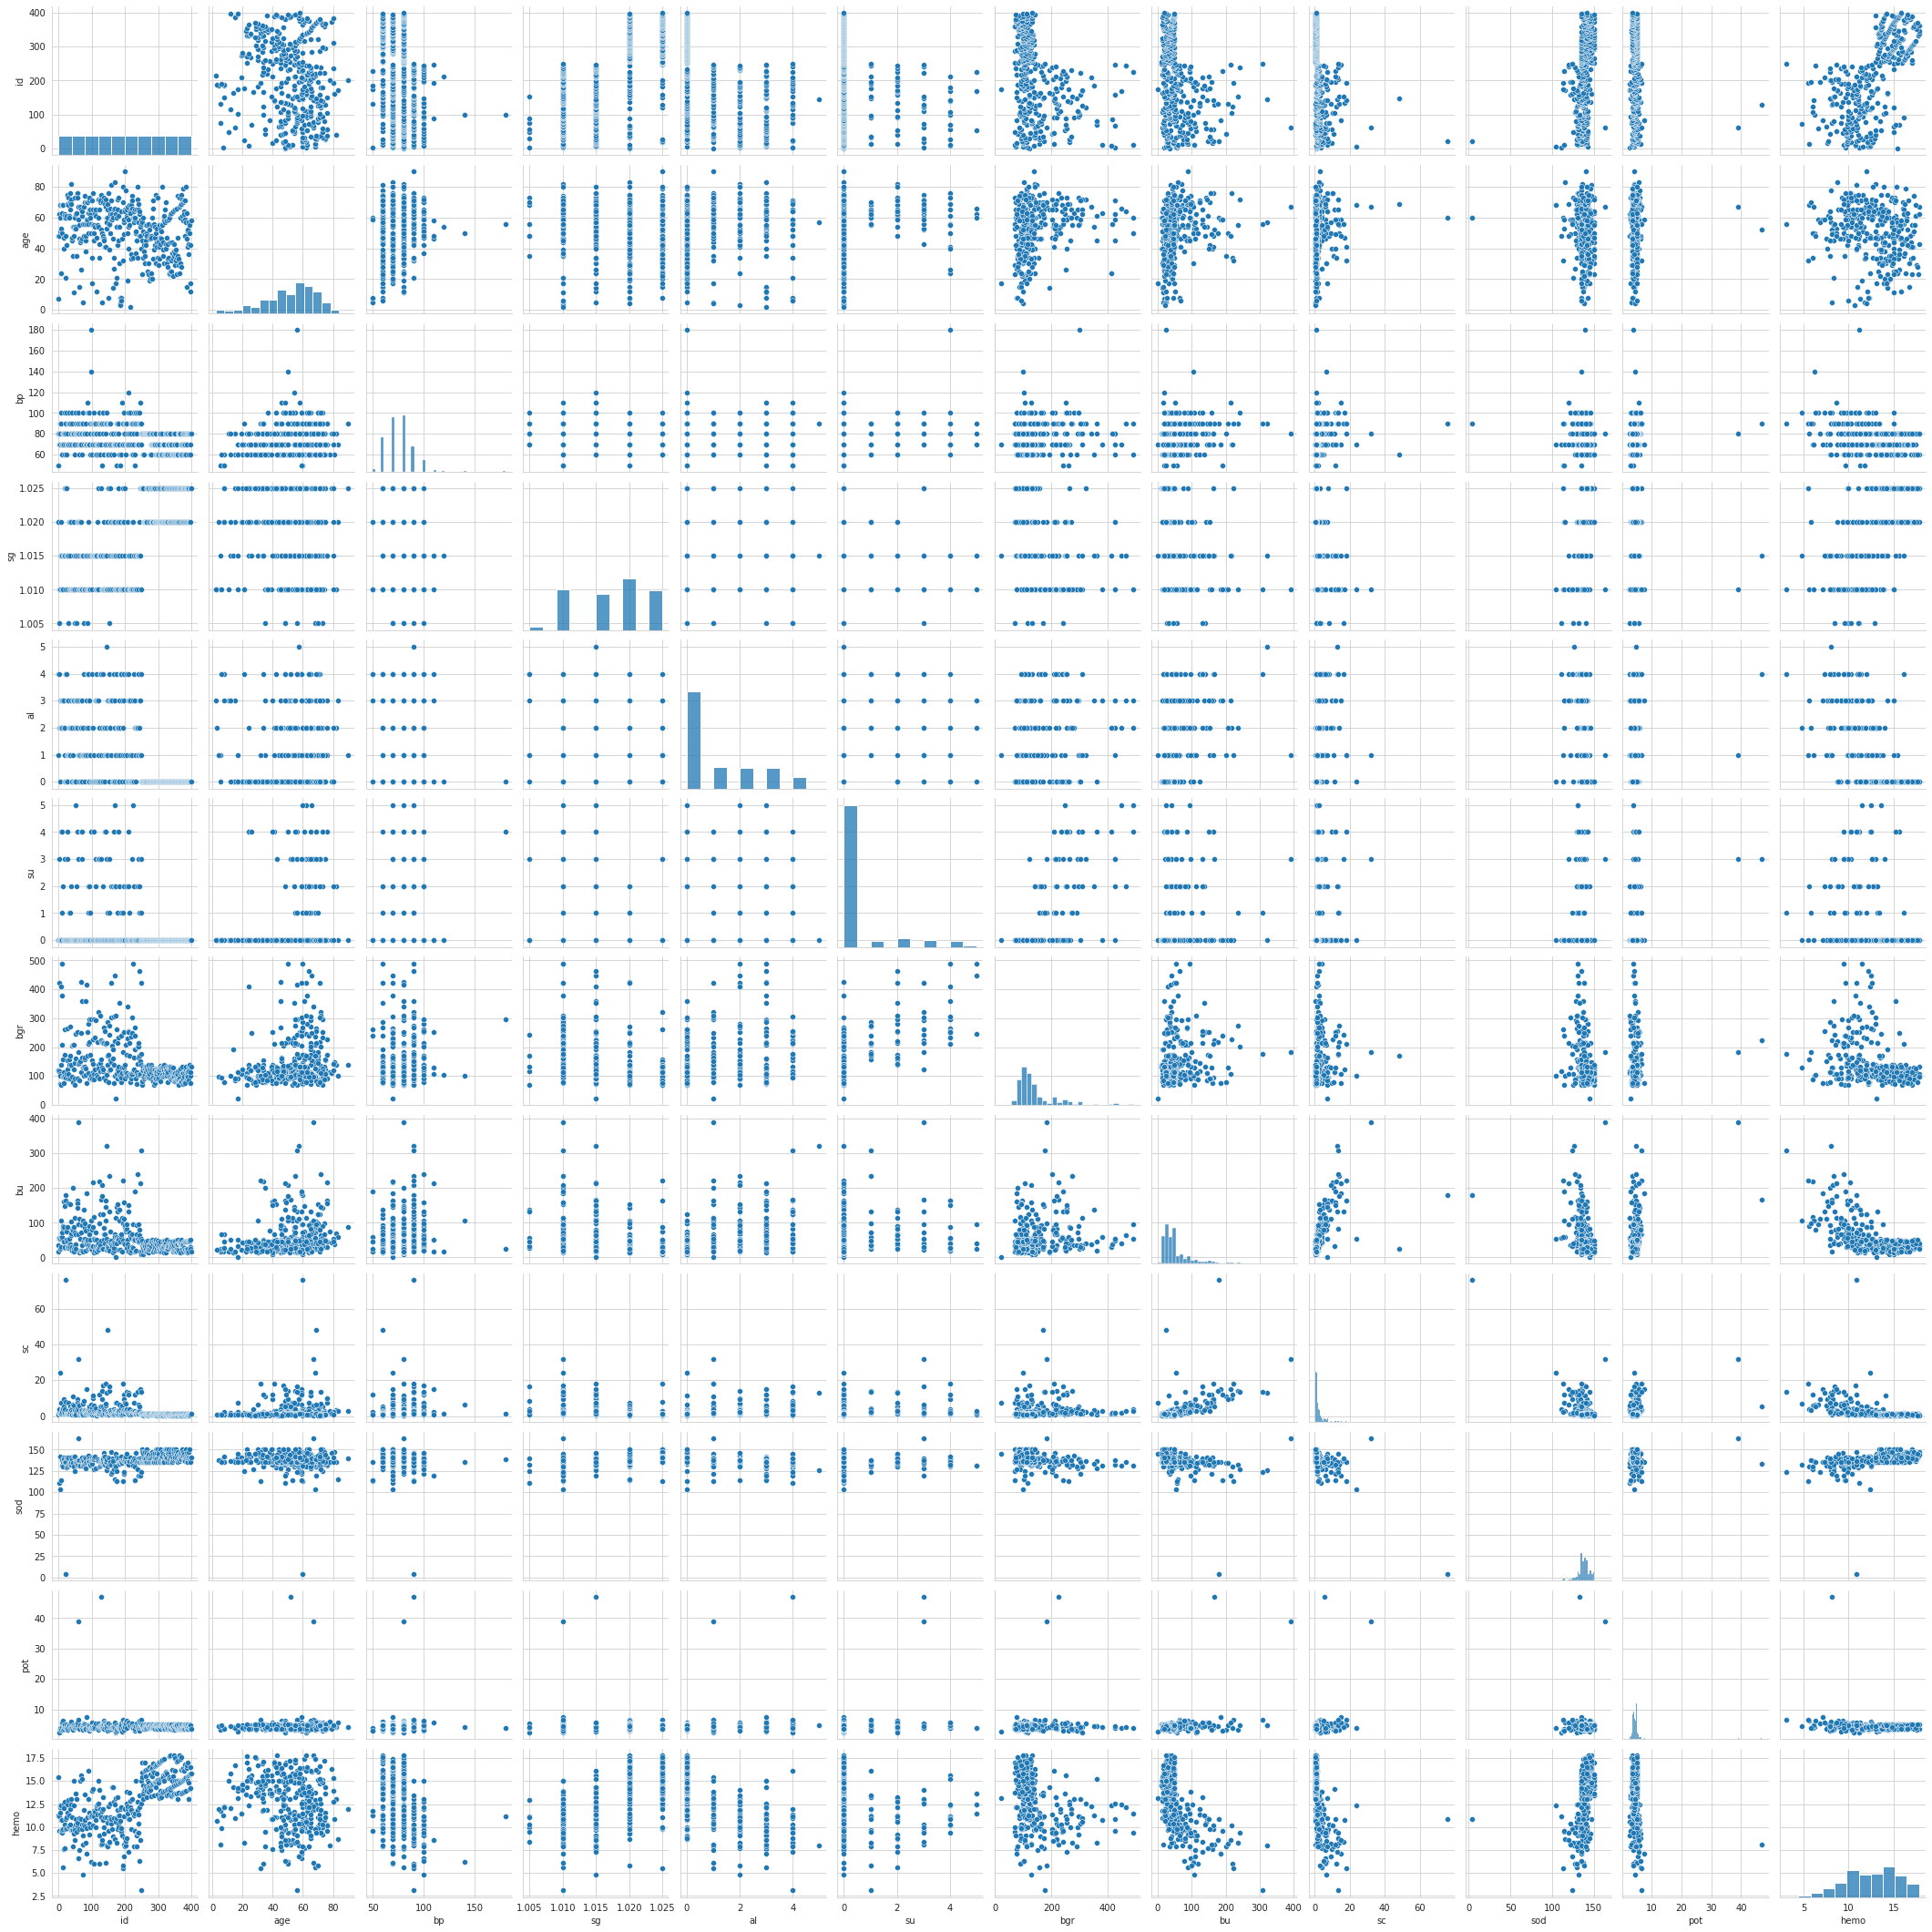

In [ ]:
#Graphical Representation
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


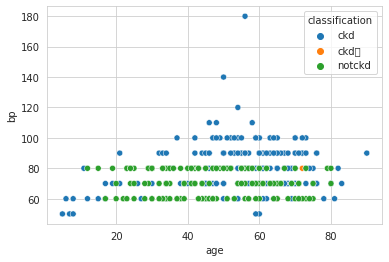

In [ ]:
# 1st plot
sns.set_style("whitegrid");
sns.scatterplot(data=df, x="age", y="bp", hue="classification", legend='brief')
plt.show()



In [ ]:
# Cleaning embiguity
# replace incorrect values
# classification : ckd ,ckd_ , not ckd

df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['cad'] = df['cad'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})



In [ ]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

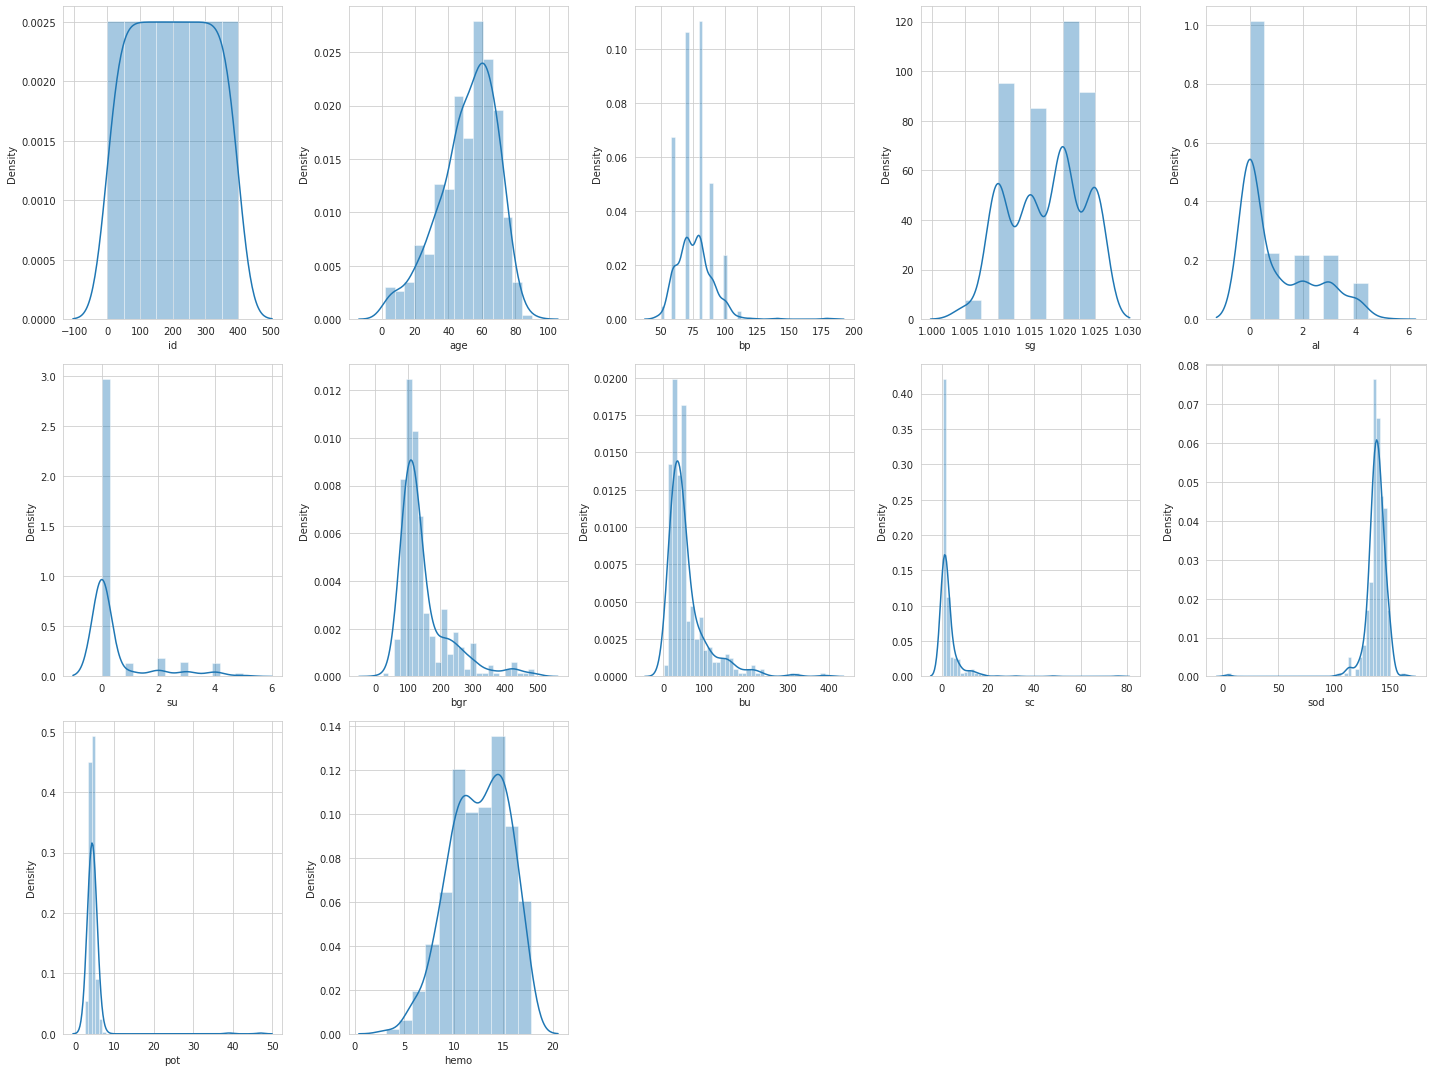

In [ ]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

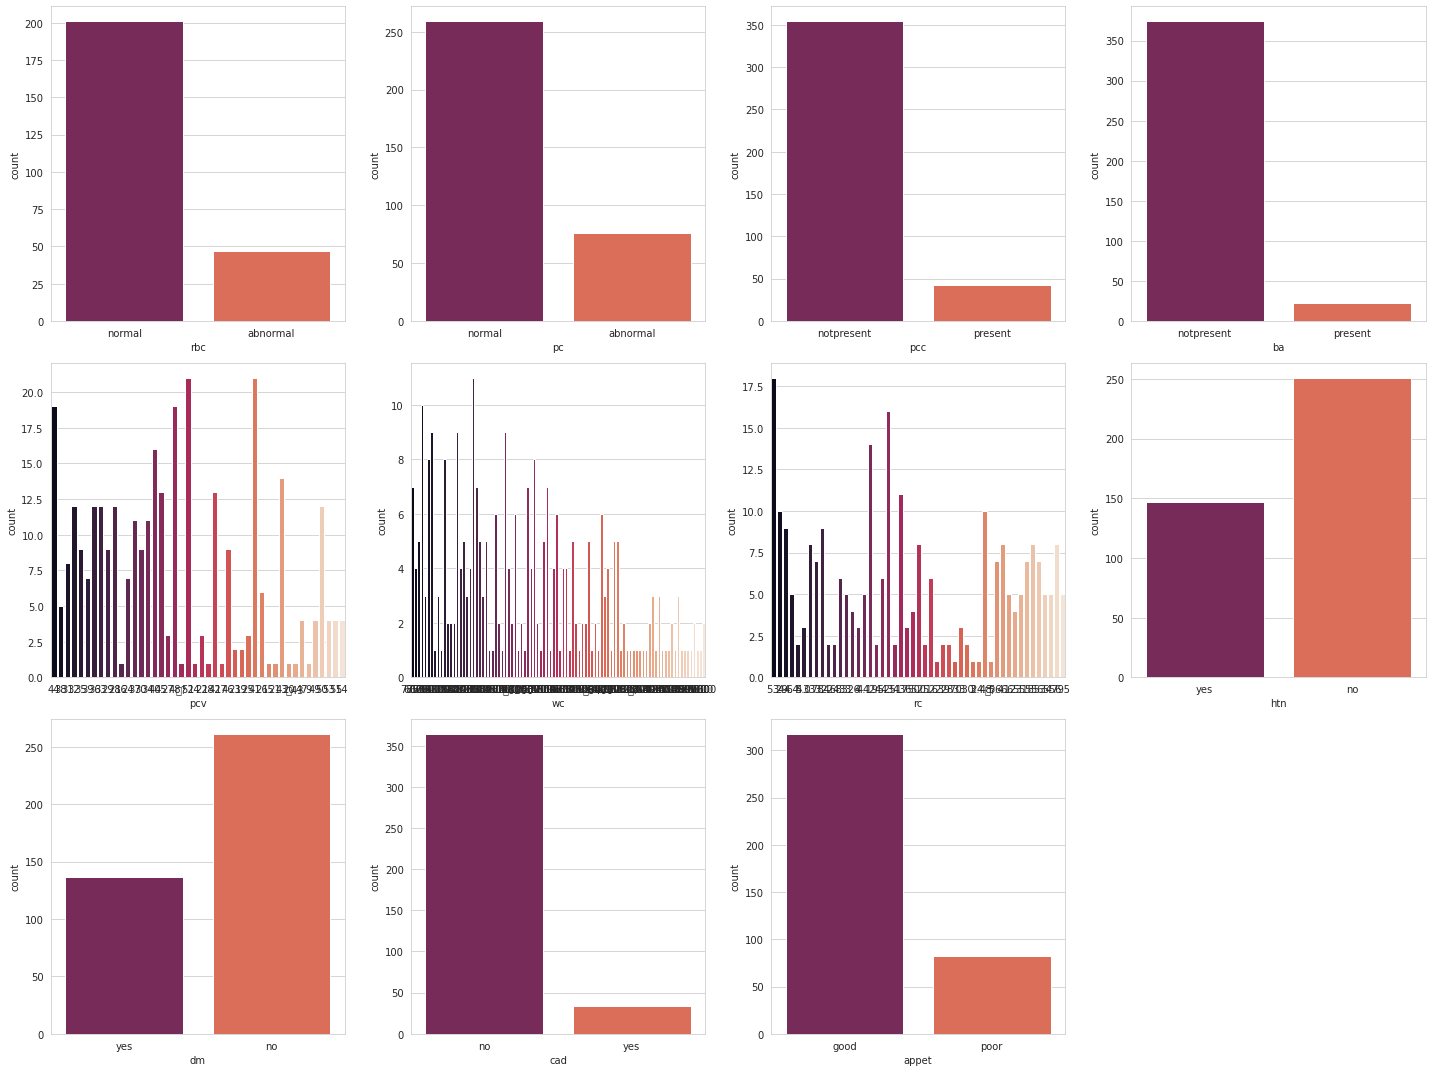

In [ ]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()


**DATA PREPROCESSING**

In [ ]:
# checking for null values
print(df.isna().sum().sort_values(ascending = False))


rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
id                  0
classification      0
dtype: int64


**DATA HANDLING**

In [ ]:
print('================== NULL VALUES IN NUMERICAL VALUES =============================')
print(df[num_cols].isnull().sum())
print('================== NULL VALUES IN CATEGORICAL VALUES =============================')
print(df[cat_cols].isnull().sum())

================== NULL VALUES IN NUMERICAL VALUES =============================
id       0
age      9
bp      12
sg      47
al      46
su      49
bgr     44
bu      19
sc      17
sod     87
pot     88
hemo    52
dtype: int64
================== NULL VALUES IN CATEGORICAL VALUES =============================
rbc               152
pc                 65
pcc                 4
ba                  4
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [ ]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)



In [ ]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [ ]:
df[num_cols].isnull().sum()

id      0
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
dtype: int64

In [ ]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('rbc')
random_value_imputation('pc')

for col in cat_cols:
    impute_mode(col)

In [ ]:
df[cat_cols].isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

pcv has 44 categories

wc has 92 categories

rc has 49 categories

htn has 2 categories

dm has 2 categories

cad has 2 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories

classification has 2 categories



In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())

   id   age    bp     sg   al   su  rbc  pc  pcc  ba  ...  pcv  wc  rc  htn  \
0   0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  ...   32  72  34    1   
1   1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  ...   26  56  34    0   
2   2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  ...   19  70  34    0   
3   3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  ...   20  62  19    1   
4   4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  ...   23  68  27    0   

   dm  cad  appet  pe  ane  classification  
0   1    0      0   0    0               0  
1   0    0      0   0    0               0  
2   1    0      1   0    1               0  
3   0    0      1   1    1               0  
4   0    0      0   0    0               0  

[5 rows x 26 columns]


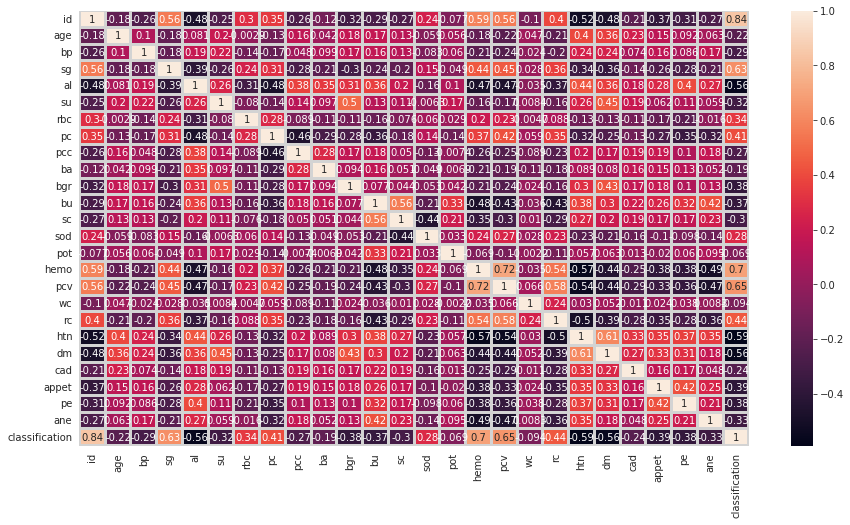

In [ ]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

2

In [ ]:
corr_features

{'classification', 'pcv'}

In [ ]:
# Drop correlated features
df.drop(corr_features,axis=1)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,4.7,15.4,72,34,1,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,5.3,11.3,56,34,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,4.9,9.6,70,34,0,1,0,1,0,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,2.5,11.2,62,19,1,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,4.5,11.6,68,27,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,4.9,15.7,62,30,0,0,0,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,3.5,16.5,72,44,0,0,0,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,4.4,15.8,61,36,0,0,0,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,4.9,14.2,67,41,0,0,0,0,0,0


**SPLIT DATA**

In [ ]:
# making copy of dataset
DATA=df.copy()
# split in x and y
y=df.pop('classification')
print(y)
print('=====================')
print(df)
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df,y, test_size=0.3)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64
      id   age    bp     sg   al   su  rbc  pc  pcc  ba  ...  hemo  pcv  wc  \
0      0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  ...  15.4   32  72   
1      1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  ...  11.3   26  56   
2      2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  ...   9.6   19  70   
3      3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  ...  11.2   20  62   
4      4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  ...  11.6   23  68   
..   ...   ...   ...    ...  ...  ...  ...  ..  ...  ..  ...   ...  ...  ..   
395  395  55.0  80.0  1.020  0.0  0.0    1   1    0   0  ...  15.7   35  62   
396  396  42.0  70.0  1.025  0.0  0.0    1   1    0   0  ...  16.5   42  72   
397  397  12.0  80.0  1.020  0.0  0.0    1   1    0   0  ...  15.8   37  61   
398  398  17.0  60.0  1.025  0.0  0.0    1   1    0   0  ...  1

# MODEL IMPLEMENTATION

**SUPPORT VECTOR MACHINE**

In [ ]:
# implementing algorthm DT
from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
SVM = SVC(kernel='linear')
# training
ModelSVM = SVM.fit(train_X,train_y)
#testing
PredictionSVM = SVM.predict(test_X)

# =====================ACCUARACY===========================
print("=====================SVM Training Accuarcy=============")
tracSVM=SVM.score(train_X,train_y)
trainingAccSVM=tracSVM*100
print(trainingAccSVM)
print("====================SVM Testing Accuracy============")
teacSVM=accuracy_score(test_y,PredictionSVM)
testingAccSVM=teacSVM*100
print(testingAccSVM)


=====================SVM Training Accuarcy=============
98.92857142857143
====================SVM Testing Accuracy============
100.0


# **Decisio Tree**

In [ ]:
DT = DecisionTreeClassifier()
ModelDT = DT.fit(train_X,train_y)
PredictionDT = DT.predict(test_X)

# =====================ACCUARACY===========================
print("=====================DT Training Accuarcy=============")
tracDT=DT.score(train_X,train_y)
trainingAccDT=tracDT*100
print(trainingAccDT)
print("====================DT Testing Accuracy============")
teacDT=accuracy_score(test_y,PredictionDT)
testingAccDT=teacDT*100
print(testingAccDT)

=====================DT Training Accuarcy=============
100.0
====================DT Testing Accuracy============
100.0


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
ModelKNN = KNN.fit(train_X,train_y)


PredictionKNN = KNN.predict(test_X)

# =====================ACCUARACY===========================
print("=====================KNN Training Accuarcy=============")
tracKNN=KNN.score(train_X,train_y)
trainingAccKNN=tracKNN*100
print(trainingAccKNN)
print("====================KNN Testing Accuracy============")

teacKNN=accuracy_score(test_y,PredictionDT)
testingAccKNN=teacKNN*100
print(testingAccKNN)


=====================KNN Training Accuarcy=============
99.28571428571429
====================KNN Testing Accuracy============
100.0
